In [1]:
print("Hello world")

Hello world


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hashlib
%matplotlib inline 

In [7]:
def load_data():
    return pd.read_csv("housing.csv")

In [55]:
housing = load_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [56]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [57]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [58]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

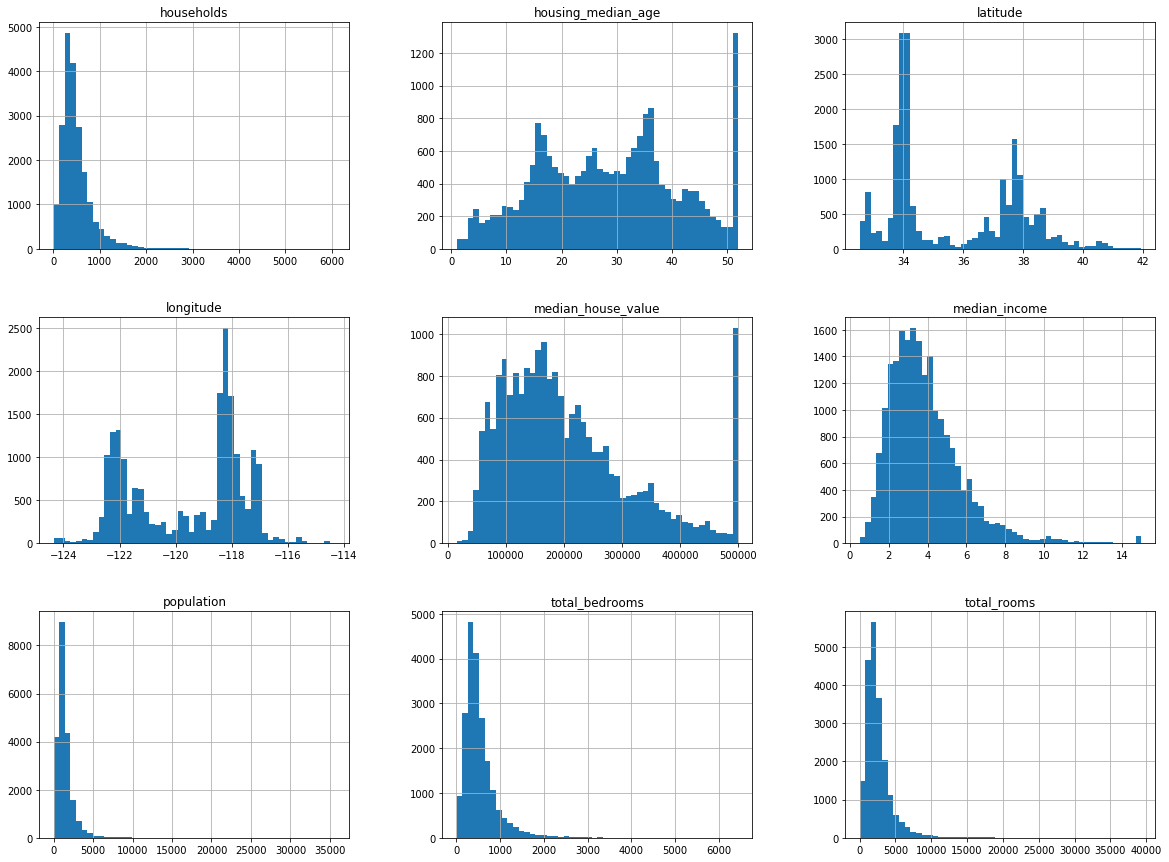

In [59]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [36]:
def split_data(data,test_data_ratio):
    np.random.seed(42)
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_data_ratio)
    test_indices = shuffled_indicies[:test_set_size]
    train_indices = shuffled_indicies[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [60]:
training_data, test_data = split_data(housing,0.2)
print("Training Data Set entries",len(training_data))
print("Training Data Set entries",len(test_data))

Training Data Set entries 16512
Training Data Set entries 4128


In [61]:
def test_set_check(identifier, test_ratio, hash):
     return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [62]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
     ids = data[id_column]
     in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
     return data.loc[~in_test_set], data.loc[in_test_set]

In [68]:
housing_with_id = housing.reset_index() ##Adds and index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [64]:
print("Training Data Set entries",len(train_set))
print("Training Data Set entries",len(test_set))

Training Data Set entries 16362
Training Data Set entries 4278


In [71]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

In [72]:
housing_with_id.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
4      4    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
4           280.0       565.0       259.0         3.8462            342200.0   

  ocean_proximity         id  
0        NEAR BAY -122192.12  
1        NEAR BAY -122182.14  
2        NEAR BAY -122202.15  
3        NEAR BAY -122212.15  
4        NEAR BAY -122212.15

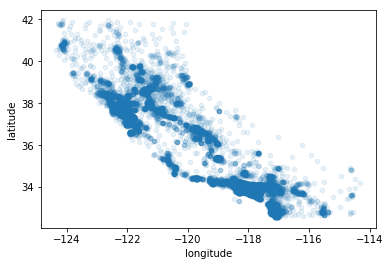

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

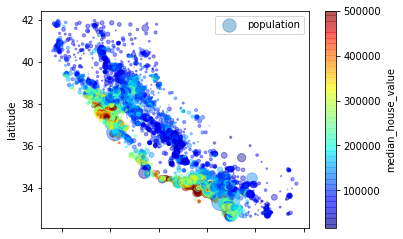

In [76]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population",
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [78]:
corr_matrix = housing.corr()
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [82]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

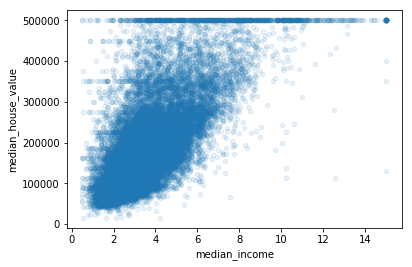

In [84]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [86]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

/Users/u0k001h/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [88]:
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
13       -122.26     37.84                52.0        696.0           191.0   
14       -122.26     37.85                52.0       2643.0           626.0   
15       -122.26     37.85                50.0       1120.0           283.0   
16       -122.27     37.85                52.0       1966.0           347.0   
17       -122.27     37.85                52.0       1228.0           293.0   
18       -122.26     37.84                50.0       2239.0           455.0   
19       -122.27     37.84                52.0       1503.0           298.0   
20       -122.27     37.85                40.0        751.0           184.0   
21       -122.27     37.85                42.0       1639.0           367.0   
22       -122.27     37.84                52.0       2436.0           541.0   
23       -122.27     37.84                52.0       1688.0           337.0   
24       -122.27     37.84                52.0       2224.0           437.0   
25       -122.28     37.85                41.0        535.0           123.0   
26       -122.28     37.85                49.0       1130.0           244.0   
27       -122.28     37.85                52.0       1898.0           421.0   
28       -122.28     37.84                50.0       2082.0           492.0   
29       -122.28     37.84                52.0        729.0           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                28.0       2130.0           484.0   
20611    -121.55     39.10                27.0       1783.0           441.0   
20612    -121.56     39.08                26.0       1377.0           289.0   
20613    -121.55     39.09                31.0       1728.0           365.0   
20614    -121.54     39.08                26.0       2276.0           460.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20619    -121.56     39.01                22.0       1891.0           340.0   
20620    -121.48     39.05                40.0        198.0            41.0   
20621    -121.47     39.01                37.0       1244.0           247.0   
20622    -121.44     39.00                20.0        755.0           147.0   
20623    -121.37     39.03                32.0       1158.0           244.0   
20624    -121.41     39.04                16.0       1698.0           300.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20626    -121.43     39.18                36.0       1124.0           184.0   
20627    -121.32     39.13                 5.0        358.0            65.0   
20628    -121.48     39.10                19.0       2043

In [89]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [90]:
 imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [91]:
housing_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [95]:
X=imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26     37.85                52.0       3503.0           752.0   
12       -122.26     37.85                52.0       2491.0           474.0   
13       -122.26     37.84                52.0        696.0           191.0   
14       -122.26     37.85                52.0       2643.0           626.0   
15       -122.26     37.85                50.0       1120.0           283.0   
16       -122.27     37.85                52.0       1966.0           347.0   
17       -122.27     37.85                52.0       1228.0           293.0   
18       -122.26     37.84                50.0       2239.0           455.0   
19       -122.27     37.84                52.0       1503.0           298.0   
20       -122.27     37.85                40.0        751.0           184.0   
21       -122.27     37.85                42.0       1639.0           367.0   
22       -122.27     37.84                52.0       2436.0           541.0   
23       -122.27     37.84                52.0       1688.0           337.0   
24       -122.27     37.84                52.0       2224.0           437.0   
25       -122.28     37.85                41.0        535.0           123.0   
26       -122.28     37.85                49.0       1130.0           244.0   
27       -122.28     37.85                52.0       1898.0           421.0   
28       -122.28     37.84                50.0       2082.0           492.0   
29       -122.28     37.84                52.0        729.0           160.0   
...          ...       ...                 ...          ...             ...   
20610    -121.56     39.10                28.0       2130.0           484.0   
20611    -121.55     39.10                27.0       1783.0           441.0   
20612    -121.56     39.08                26.0       1377.0           289.0   
20613    -121.55     39.09                31.0       1728.0           365.0   
20614    -121.54     39.08                26.0       2276.0           460.0   
20615    -121.54     39.08                23.0       1076.0           216.0   
20616    -121.53     39.08                15.0       1810.0           441.0   
20617    -121.53     39.06                20.0        561.0           109.0   
20618    -121.55     39.06                25.0       1332.0           247.0   
20619    -121.56     39.01                22.0       1891.0           340.0   
20620    -121.48     39.05                40.0        198.0            41.0   
20621    -121.47     39.01                37.0       1244.0           247.0   
20622    -121.44     39.00                20.0        755.0           147.0   
20623    -121.37     39.03                32.0       1158.0           244.0   
20624    -121.41     39.04                16.0       1698.0           300.0   
20625    -121.52     39.12                37.0        102.0            17.0   
20626    -121.43     39.18                36.0       1124.0           184.0   
20627    -121.32     39.13                 5.0        358.0            65.0   
20628    -121.48     39.10                19.0       2043

In [99]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))


/Users/u0k001h/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', Imputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

/Users/u0k001h/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])